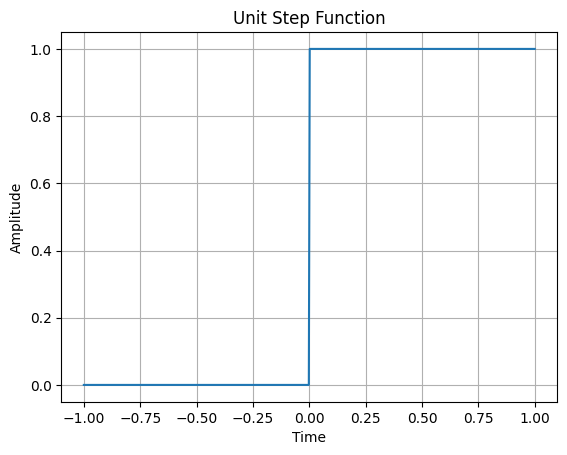

In [1]:
# UNit step function

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

# define time axis
t = np.linspace(-1, 1, 500)

# generate unit step signal
u = np.heaviside(t, 1)

# plot
plt.plot(t, u)
plt.title("Unit Step Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

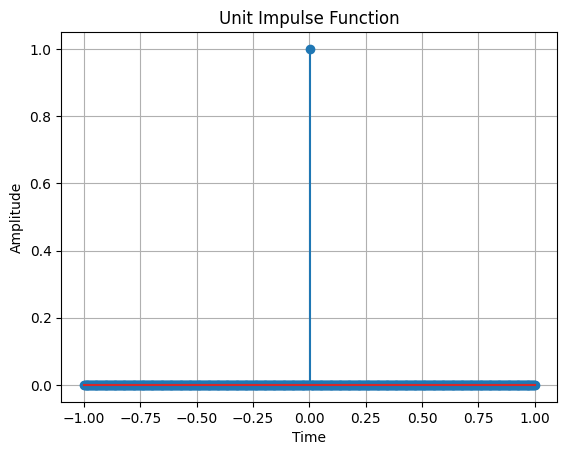

In [4]:
# unit impulese function
impulse = np.zeros_like(t)
impulse[250] = 1

# plot
plt.stem(t, impulse)
plt.title("Unit Impulse Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

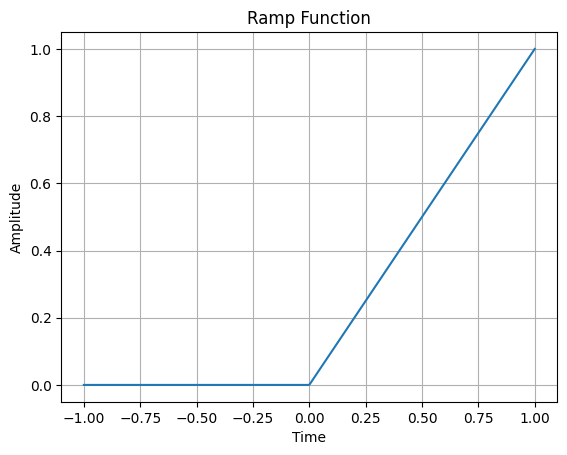

In [5]:
# ramp function
ramp = t * (t>=0)

# plot
plt.plot(t, ramp)
plt.title("Ramp Function")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

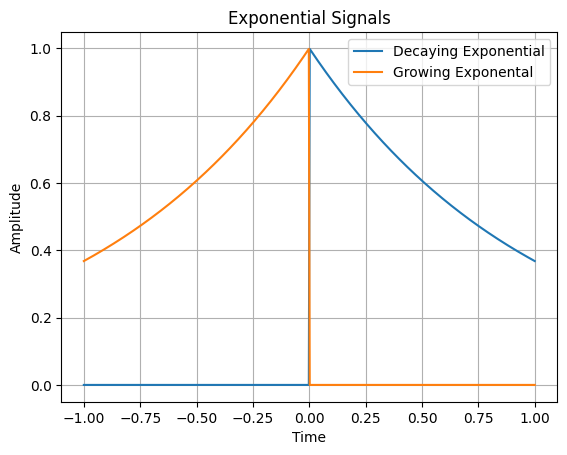

In [6]:
# exponential signal (decaying and growing)

# generate decaying exponential
exp_decay = np.exp(-t) * (t >= 0)

# generate growing exponential
exp_grow = np.exp(t) * (t <= 0)

# plot both
plt.plot(t, exp_decay, label='Decaying Exponential')
plt.plot(t, exp_grow, label='Growing Exponental')
plt.title("Exponential Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

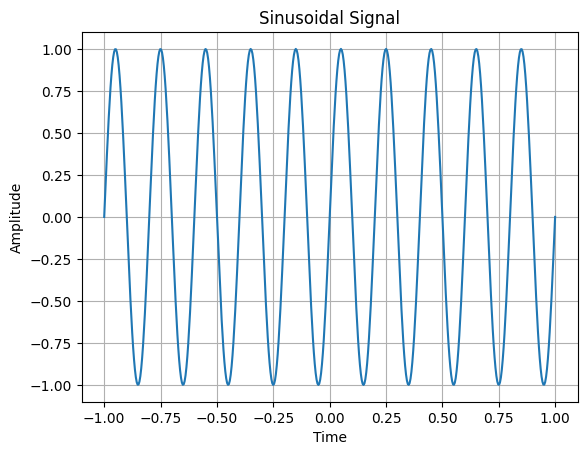

In [7]:
# sinusoidal signal
sin_signal = np.sin(2 * np.pi * 5 * t)

# plot
plt.plot(t, sin_signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

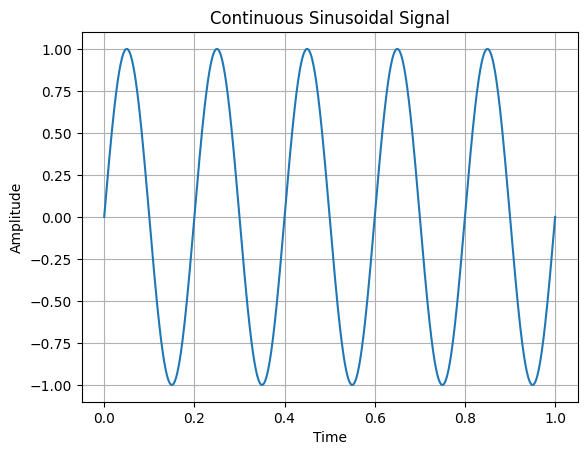

In [8]:
# Part 2: Sampling and Reconstruction
# Continuous Sinusoidal Signal
f_cont = 5 # frequency in Hz
t_cont = np.linspace(0, 1, 1000)
continuous_signal = np.sin(2 * np.pi * f_cont * t_cont)

# plot
plt.plot(t_cont, continuous_signal)
plt.title("Continuous Sinusoidal Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [9]:
# (b) sampling the signal at different rates

# Nyquist rate (f_s = 2 * f_count)
nyquist_rate = 2 * f_cont
t_nyquist = np.arange(0, 1, 1 / nyquist_rate)
sampled_signal_nyquist = np.sin(2 * np.pi * f_cont * t_nyquist)

# above Nyquist (f_s > 2 * f_cont)
above_nyquist_rate = 4 * f_cont
t_above = np.arange(0, 1, 1 / above_nyquist_rate)
sampled_signal_above = np.sin(2 * np.sin(2 * np.pi * f_cont * t_above))

# below Nyquist (f_s < 2 * f_cont)
below_nyquist_rate = 1.5 * f_cont
t_below = np.arange(0, 1, 1 / below_nyquist_rate)
sampled_signal_below = np.sin(2 * np.pi * f_cont * t_below)

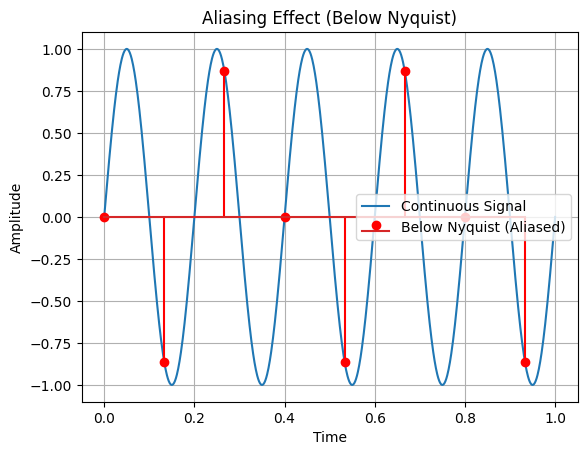

In [10]:
# (c) reconstructing and observing aliasing

plt.plot(t_cont, continuous_signal, label="Continuous Signal")
plt.stem(t_below, sampled_signal_below, linefmt='r-', markerfmt='ro', label="Below Nyquist (Aliased)")
plt.title("Aliasing Effect (Below Nyquist)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

**Part 3: Continuous and Discrete Sinusoidal Signal**

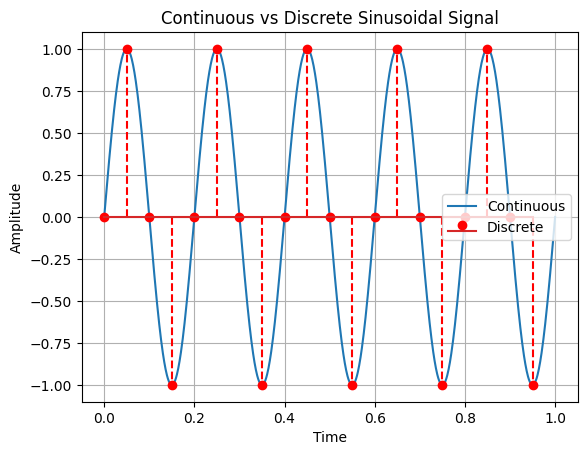

In [12]:
# Continuous version
t_cont = np.linspace(0, 1, 1000)
continuous_signal = np.sin(2 * np.pi * 5 * t_cont)

# Discrete version
sampling_rate = 20  # 20 samples per second (discrete signal)
t_disc = np.linspace(0, 1, sampling_rate, endpoint=False)
discrete_signal = np.sin(2 * np.pi * 5 * t_disc)

# Plot
plt.plot(t_cont, continuous_signal, label="Continuous")
plt.stem(t_disc, discrete_signal, linefmt='r--', markerfmt='ro', label="Discrete")
plt.title("Continuous vs Discrete Sinusoidal Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


**Part 4: Time shifting and Scaling**

(a) Time Shifting (Delaying and Advancing)

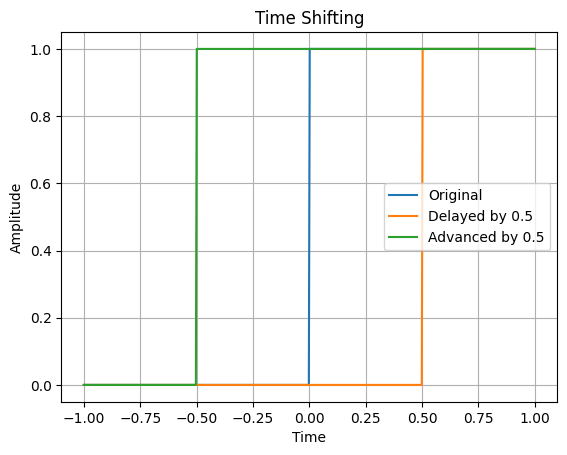

In [15]:
# Unit step signal
u = np.heaviside(t, 1)

# Time shifting
shift_right = np.heaviside(t - 0.5, 1)  # Delayed by 0.5
shift_left = np.heaviside(t + 0.5, 1)   # Advanced by 0.5

# Plot
plt.plot(t, u, label="Original")
plt.plot(t, shift_right, label="Delayed by 0.5")
plt.plot(t, shift_left, label="Advanced by 0.5")
plt.title("Time Shifting")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

(b) Time Scaling (Compressiong and Expansion)

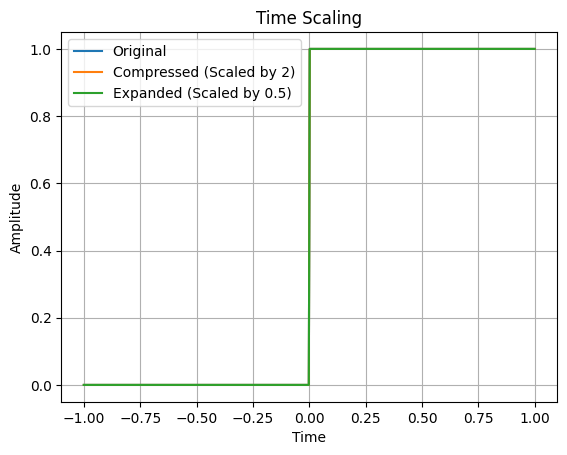

In [16]:
# Time scaling
compressed = np.heaviside(2 * t, 1)  # Compressed
expanded = np.heaviside(0.5 * t, 1)  # Expanded

# Plot
plt.plot(t, u, label="Original")
plt.plot(t, compressed, label="Compressed (Scaled by 2)")
plt.plot(t, expanded, label="Expanded (Scaled by 0.5)")
plt.title("Time Scaling")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

**Part 5: Adding and Scaling Sinusoids**

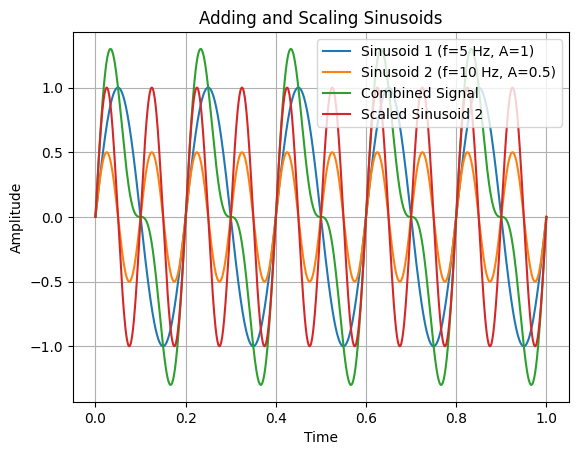

In [17]:
# Define parameters for two sinusoids
t = np.linspace(0, 1, 1000)
sin1 = 1 * np.sin(2 * np.pi * 5 * t)
sin2 = 0.5 * np.sin(2 * np.pi * 10 * t)

# Add the two signals
combined_signal = sin1 + sin2

# Scale the second sinusoid
scaled_sin2 = 2 * sin2

# Plot the results
plt.plot(t, sin1, label="Sinusoid 1 (f=5 Hz, A=1)")
plt.plot(t, sin2, label="Sinusoid 2 (f=10 Hz, A=0.5)")
plt.plot(t, combined_signal, label="Combined Signal")
plt.plot(t, scaled_sin2, label="Scaled Sinusoid 2")
plt.title("Adding and Scaling Sinusoids")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

**Part 6: Noise Addition and Filtering**

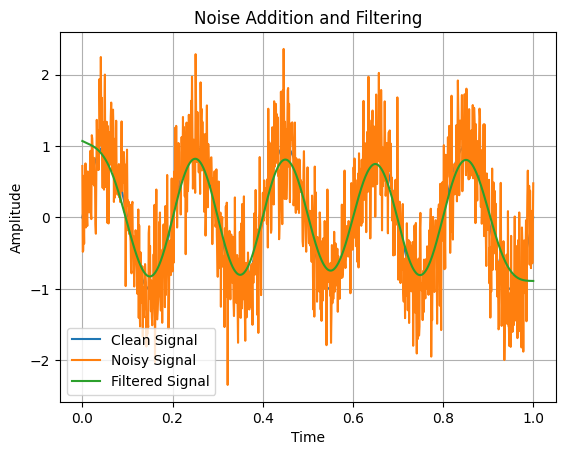

In [18]:
from scipy.signal import butter, filtfilt

# Generate clean sinusoidal signal
clean_signal = np.sin(2 * np.pi * 5 * t)

# Add Gaussian noise
noise = np.random.normal(0, 0.5, clean_signal.shape)
noisy_signal = clean_signal + noise

# Apply low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Low-pass filter parameters
cutoff = 6  # Cutoff frequency
fs = 1000  # Sampling frequency
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff, fs)

# Plot the signals
plt.plot(t, clean_signal, label="Clean Signal")
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.plot(t, filtered_signal, label="Filtered Signal")
plt.title("Noise Addition and Filtering")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

**Part 7: FFT and Frequency Spectrum**

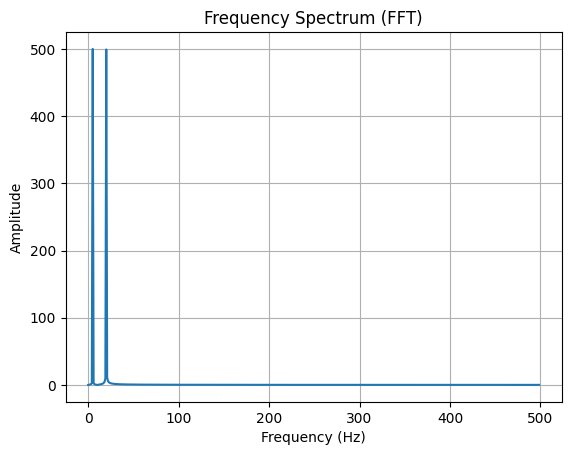

In [19]:
# Generate composite signal
f1, f2 = 5, 20
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Perform FFT
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=t[1] - t[0])

# Plot the frequency spectrum
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(fft_signal)//2])
plt.title("Frequency Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

**Part 8: Square Wave Generation**

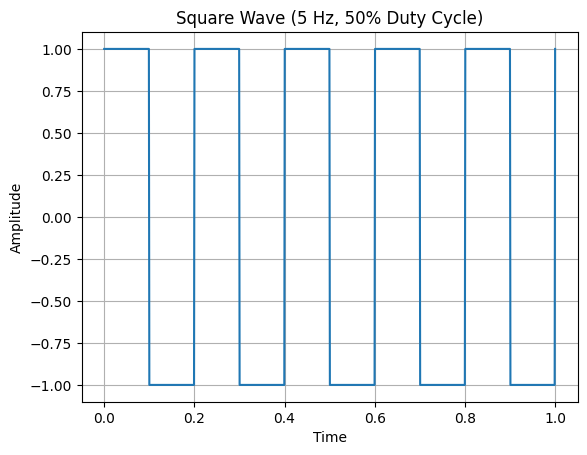

In [20]:
from scipy.signal import square

# Generate square wave
square_wave = square(2 * np.pi * 5 * t, duty=0.5)

# Plot square wave
plt.plot(t, square_wave)
plt.title("Square Wave (5 Hz, 50% Duty Cycle)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

**Part 9: Z-Transform and Poles/Zeros**

In [21]:
# 1. Generate a unit step signal
step_signal = np.heaviside(np.arange(0, 10), 1)

# apply z-transform using sympy
from sympy import symbols, ztrans, Heaviside

n = symbols('n', integer=True)
z = symbols('z')
step_signal_sym = Heaviside(n)
Z_step_signal = ztrans(step_signal_sym, n, z)

ImportError: cannot import name 'ztrans' from 'sympy' (c:\Users\ABHINAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sympy\__init__.py)